In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
file_path = 'crime.csv'
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataframe to get a sense of the data
print(df.head())

         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23     

In [4]:
# Get some basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             1000 non-null   object
 1   DISTRICT                                             1000 non-null   object
 2   YEAR                                                 1000 non-null   int64 
 3   MURDER                                               1000 non-null   int64 
 4   ATTEMPT TO MURDER                                    1000 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            1000 non-null   int64 
 6   RAPE                                                 1000 non-null   int64 
 7   CUSTODIAL RAPE                                       1000 non-null   int64 
 8   OTHER RAPE                                           1000 non-null   int64 
 9 

In [5]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [6]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2001.284000,100.740000,84.338000,8.596000,44.052000,0.002000,44.050000,62.056000,39.701000,22.355000,...,31.742000,726.448000,18.232000,89.235000,27.793000,133.561000,0.376000,154.112000,1850.154000,4701.951000
std,0.451162,368.201593,350.482498,46.445451,156.568256,0.044699,156.566243,232.052656,151.118498,97.816006,...,115.691322,2851.330887,89.437449,351.548973,153.028723,525.560495,3.753493,644.505211,6341.322237,15931.428681
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,21.000000,10.000000,0.000000,6.000000,0.000000,6.000000,8.000000,4.000000,1.000000,...,3.000000,38.750000,0.000000,8.000000,0.000000,8.000000,0.000000,0.000000,251.000000,780.500000
50%,2001.000000,42.000000,29.000000,2.000000,16.000000,0.000000,16.000000,21.000000,13.000000,6.000000,...,10.000000,209.500000,5.000000,27.000000,2.000000,35.500000,0.000000,38.000000,712.000000,1916.500000
75%,2002.000000,76.000000,63.000000,5.000000,37.000000,0.000000,37.000000,47.000000,31.000000,16.000000,...,24.000000,533.500000,14.000000,67.000000,12.000000,101.250000,0.000000,125.000000,1425.750000,3608.000000
max,2002.000000,7601.000000,7964.000000,1186.000000,2851.000000,1.000000,2851.000000,4330.000000,2879.000000,1641.000000,...,1915.000000,39839.000000,2211.000000,7063.000000,2575.000000,7365.000000,83.000000,8993.000000,85143.000000,181741.000000


In [7]:
#detect outliers
import pandas as pd

# Load dataset (skip if already loaded)
df = pd.read_csv("crime.csv")

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Dictionary to store outlier count
outlier_counts = {}

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts[col] = len(outliers)

# Display number of outliers in each column
print("Outliers detected per column:\n")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Outliers detected per column:

YEAR: 0
MURDER: 67
ATTEMPT TO MURDER: 84
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER: 127
RAPE: 59
CUSTODIAL RAPE: 2
OTHER RAPE: 59
KIDNAPPING & ABDUCTION: 79
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS: 78
KIDNAPPING AND ABDUCTION OF OTHERS: 91
DACOITY: 97
PREPARATION AND ASSEMBLY FOR DACOITY: 113
ROBBERY: 83
BURGLARY: 74
THEFT: 98
AUTO THEFT: 121
OTHER THEFT: 91
RIOTS: 80
CRIMINAL BREACH OF TRUST: 90
CHEATING: 118
COUNTERFIETING: 81
ARSON: 78
HURT/GREVIOUS HURT: 90
DOWRY DEATHS: 81
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY: 97
INSULT TO MODESTY OF WOMEN: 131
CRUELTY BY HUSBAND OR HIS RELATIVES: 76
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES: 36
CAUSING DEATH BY NEGLIGENCE: 75
OTHER IPC CRIMES: 70
TOTAL IPC CRIMES: 62


In [8]:
#remove outliers
df_cleaned = df.copy()

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Keep only rows within bounds
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

print("Shape after removing outliers:", df_cleaned.shape)


Shape after removing outliers: (105, 33)


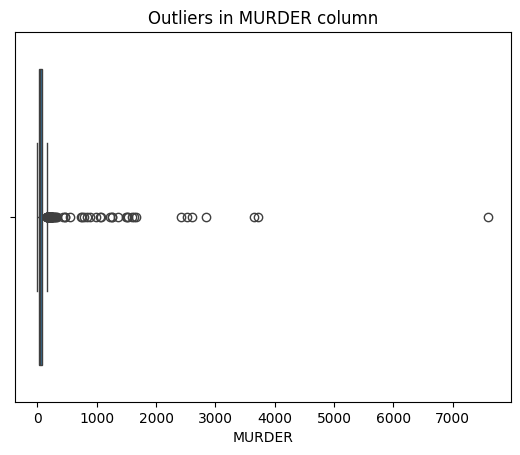

In [9]:
#visulaize outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Example boxplot for one column
sns.boxplot(x=df['MURDER'])
plt.title("Outliers in MURDER column")
plt.show()


In [10]:
#Skewness
import pandas as pd

# Load the dataset (skip if already loaded)
df = pd.read_csv("crime.csv")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness
skewness = df[numeric_cols].skew()

# Display skewness values
print("Skewness of numerical columns:\n")
print(skewness.sort_values(ascending=False))


Skewness of numerical columns:

CUSTODIAL RAPE                                         22.327046
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              19.113776
DOWRY DEATHS                                           17.414154
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES            15.085283
ATTEMPT TO MURDER                                      14.572266
PREPARATION AND ASSEMBLY FOR DACOITY                   13.219885
KIDNAPPING AND ABDUCTION OF OTHERS                     12.886789
CRIMINAL BREACH OF TRUST                               12.578815
MURDER                                                 12.181000
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY    12.114102
INSULT TO MODESTY OF WOMEN                             11.995428
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            11.620541
ROBBERY                                                11.299020
DACOITY                                                11.021823
KIDNAPPING & ABDUCTION                                 10.

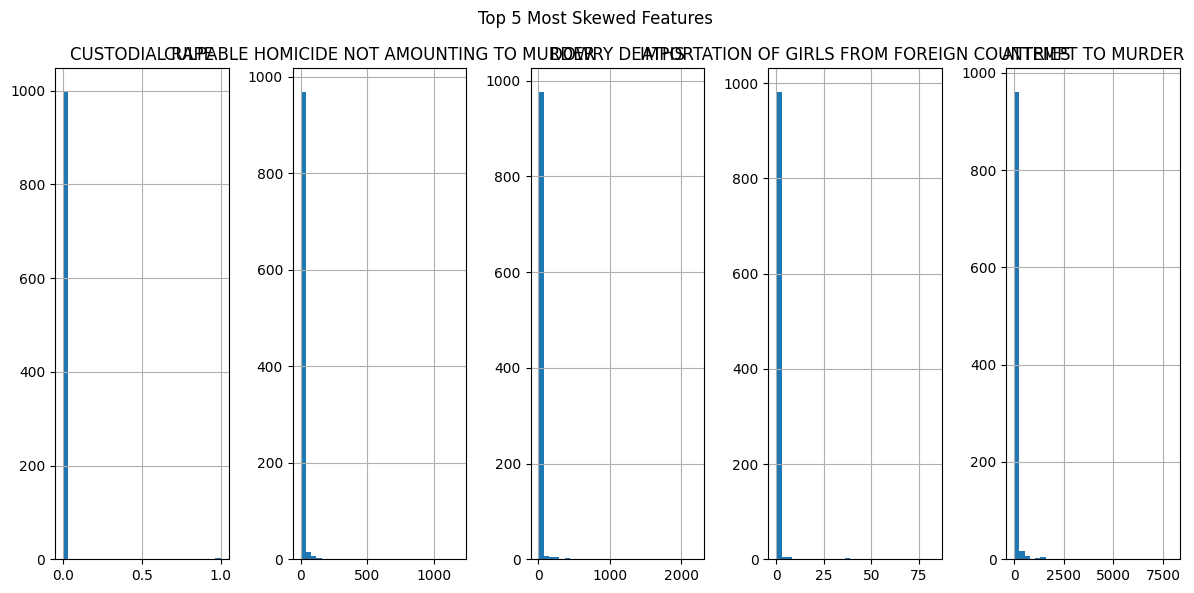

In [11]:
#Visualize Skewness
import matplotlib.pyplot as plt

# Plot histograms for top 5 skewed features
top_skewed = skewness.abs().sort_values(ascending=False).head(5).index

df[top_skewed].hist(bins=30, figsize=(12, 6), layout=(1, 5))
plt.suptitle("Top 5 Most Skewed Features")
plt.tight_layout()
plt.show()



In [12]:
#correlation
import pandas as pd

# Load dataset (skip if already done)
df = pd.read_csv("crime.csv")

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Display the matrix
print("Correlation matrix:\n")
print(correlation_matrix)


Correlation matrix:

                                                        YEAR    MURDER  \
YEAR                                                1.000000 -0.001652   
MURDER                                             -0.001652  1.000000   
ATTEMPT TO MURDER                                  -0.016839  0.958112   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER          -0.027672  0.853927   
RAPE                                               -0.008627  0.827177   
CUSTODIAL RAPE                                      0.071080  0.036767   
OTHER RAPE                                         -0.008647  0.827177   
KIDNAPPING & ABDUCTION                             -0.005181  0.907366   
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS        -0.012686  0.831325   
KIDNAPPING AND ABDUCTION OF OTHERS                  0.007308  0.868245   
DACOITY                                             0.048770  0.821898   
PREPARATION AND ASSEMBLY FOR DACOITY               -0.031551  0.494578   
ROBBERY          

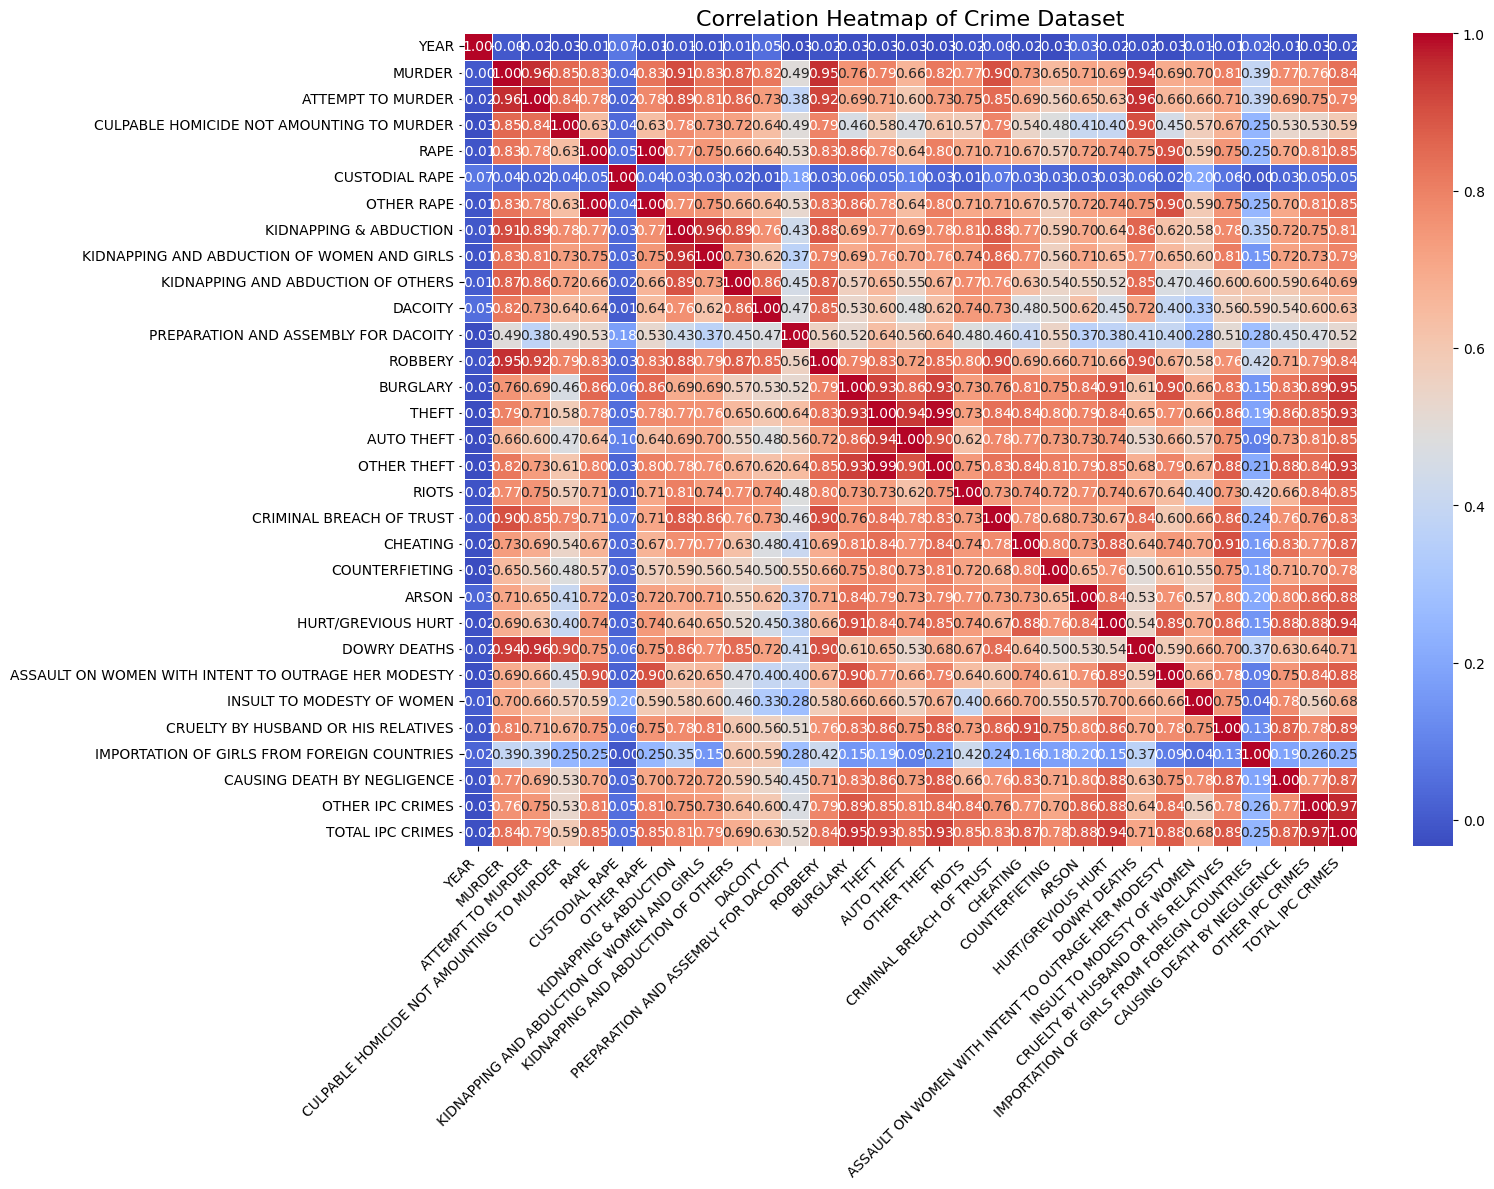

In [13]:
#Visualize Correlation with Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(16, 12))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Crime Dataset", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
#standardization
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset (skip if already loaded)
df = pd.read_csv("crime.csv")

# Select numeric columns to standardize
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Show result
print("Standardized data (first 5 rows):")
print(df_scaled[numeric_cols].head())


Standardized data (first 5 rows):
     YEAR    MURDER  ATTEMPT TO MURDER  \
0 -0.6298  0.000706          -0.069476   
1 -0.6298  0.136570           0.116075   
2 -0.6298  0.000706          -0.078040   
3 -0.6298 -0.056356          -0.089459   
4 -0.6298 -0.050921          -0.049494   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER      RAPE  CUSTODIAL RAPE  \
0                                   0.181034  0.038009       -0.044766   
1                                  -0.163629 -0.134526       -0.044766   
2                                  -0.142087 -0.108965       -0.044766   
3                                  -0.163629 -0.153697       -0.044766   
4                                  -0.163629 -0.134526       -0.044766   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0    0.038022               -0.069226   
1   -0.134515               -0.039045   
2   -0.108954               -0.013176   
3   -0.153686               -0.159768   
4   -0.134515               -0.056291   

   KIDNAPPING AND ABD

In [15]:
#normalization
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load dataset (skip if already loaded)
df = pd.read_csv("crime.csv")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Apply normalization
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Show first 5 rows of normalized data
print("Normalized data (first 5 rows):")
print(df_normalized[numeric_cols].head())


Normalized data (first 5 rows):
   YEAR    MURDER  ATTEMPT TO MURDER  \
0   0.0  0.013288           0.007534   
1   0.0  0.019866           0.015696   
2   0.0  0.013288           0.007157   
3   0.0  0.010525           0.006655   
4   0.0  0.010788           0.008413   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER      RAPE  CUSTODIAL RAPE  \
0                                   0.014334  0.017538             0.0   
1                                   0.000843  0.008067             0.0   
2                                   0.001686  0.009470             0.0   
3                                   0.000843  0.007015             0.0   
4                                   0.000843  0.008067             0.0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0    0.017538                0.010624   
1    0.008067                0.012240   
2    0.009470                0.013626   
3    0.007015                0.005774   
4    0.008067                0.011316   

   KIDNAPPING AND ABDUCTION OF WOME

In [16]:
#one-hot encoding
import pandas as pd

# Load dataset (skip if already done)
df = pd.read_csv("crime.csv")

# Identify categorical columns (object/string types)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display first 5 rows of the encoded dataset
print("One-hot encoded data (first 5 rows):")
print(df_encoded.head())


Categorical columns: ['STATE/UT', 'DISTRICT']
One-hot encoded data (first 5 rows):
   YEAR  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0  2001     101                 60                                         17   
1  2001     151                125                                          1   
2  2001     101                 57                                          2   
3  2001      80                 53                                          1   
4  2001      82                 67                                          1   

   RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0    50               0          50                      46   
1    23               0          23                      53   
2    27               0          27                      59   
3    20               0          20                      25   
4    23               0          23                      49   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0

In [17]:
# Train-test split
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("crime.csv")

# Create a target variable: High vs Low crime based on 75th percentile
threshold = df['TOTAL IPC CRIMES'].quantile(0.75)
df['Crime_Level'] = (df['TOTAL IPC CRIMES'] >= threshold).map({True: 1, False: 0})  # 1 = High, 0 = Low

# Drop non-numeric + target column to form feature set
X = df.drop(columns=['TOTAL IPC CRIMES', 'Crime_Level'])  # You can include TOTAL IPC CRIMES if you want
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical columns

# Target variable
y = df['Crime_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Output shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (800, 733)
Shape of X_test: (200, 733)
Shape of y_train: (800,)
Shape of y_test: (200,)


Accuracy: 0.870

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       150
           1       0.90      0.54      0.68        50

    accuracy                           0.87       200
   macro avg       0.88      0.76      0.80       200
weighted avg       0.87      0.87      0.86       200

Confusion Matrix:
 [[147   3]
 [ 23  27]]
ROC AUC: 0.934


C:\Users\deeks\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


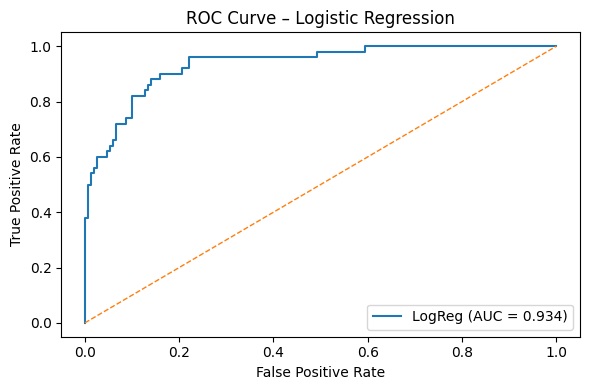

In [18]:
# Logistic Regression on the Crime-Level target
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,
                             roc_auc_score,
                             roc_curve)
import matplotlib.pyplot as plt

# (1) Assume X_train, X_test, y_train, y_test are already defined
#     from the previous train_test_split step.

# (2) Build a pipeline: Standardize ➜ Logistic Regression
#     • with_mean=False keeps sparse matrix efficiency after one-hot encoding.
log_reg_clf = make_pipeline(
    StandardScaler(with_mean=False),
    LogisticRegression(max_iter=1000,
                       class_weight='balanced',   # handles class imbalance
                       random_state=42)
)

# (3) Fit the model
log_reg_clf.fit(X_train, y_train)

# (4) Predict and evaluate
y_pred        = log_reg_clf.predict(X_test)
y_pred_proba  = log_reg_clf.predict_proba(X_test)[:, 1]

print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC: {:.3f}".format(roc_auc))

# (5) Optional: Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="LogReg (AUC = {:.3f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
#svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build SVM pipeline (with scaling)
svm_model = make_pipeline(
    StandardScaler(with_mean=False),
    SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


SVM Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       150
           1       0.00      0.00      0.00        50

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.56      0.75      0.64       200

Confusion Matrix:
 [[150   0]
 [ 50   0]]


C:\Users\deeks\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\deeks\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\deeks\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [20]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Random Forest Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       150
           1       0.98      0.86      0.91        50

    accuracy                           0.96       200
   macro avg       0.97      0.93      0.94       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
 [[149   1]
 [  7  43]]
ROC AUC Score: 0.9956666666666666


In [21]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Decision Tree Accuracy: 0.905

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       150
           1       0.80      0.82      0.81        50

    accuracy                           0.91       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.91      0.91      0.91       200

Confusion Matrix:
 [[140  10]
 [  9  41]]
ROC AUC Score: 0.8766666666666666


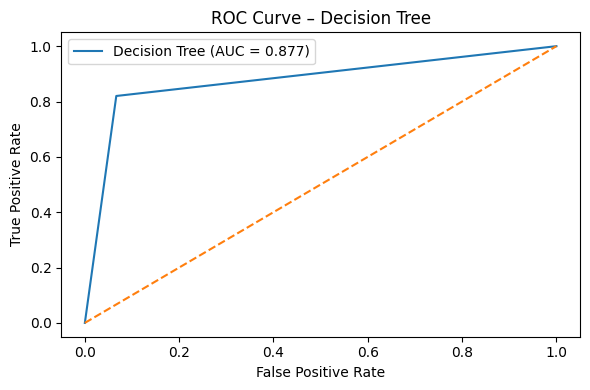

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\deeks\AppData\Local\Temp\ipykernel_8644\2585072195.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_crime_rates['STATE_DISTRICT'] = top_15_crime_rates['STATE/UT'] + ' - ' + top_15_crime_rates['DISTRICT']
C:\Users\deeks\AppData\Local\Temp\ipykernel_8644\2585072195.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATE_DISTRICT', y='TOTAL IPC CRIMES', data=top_15_crime_rates, palette='viridis')


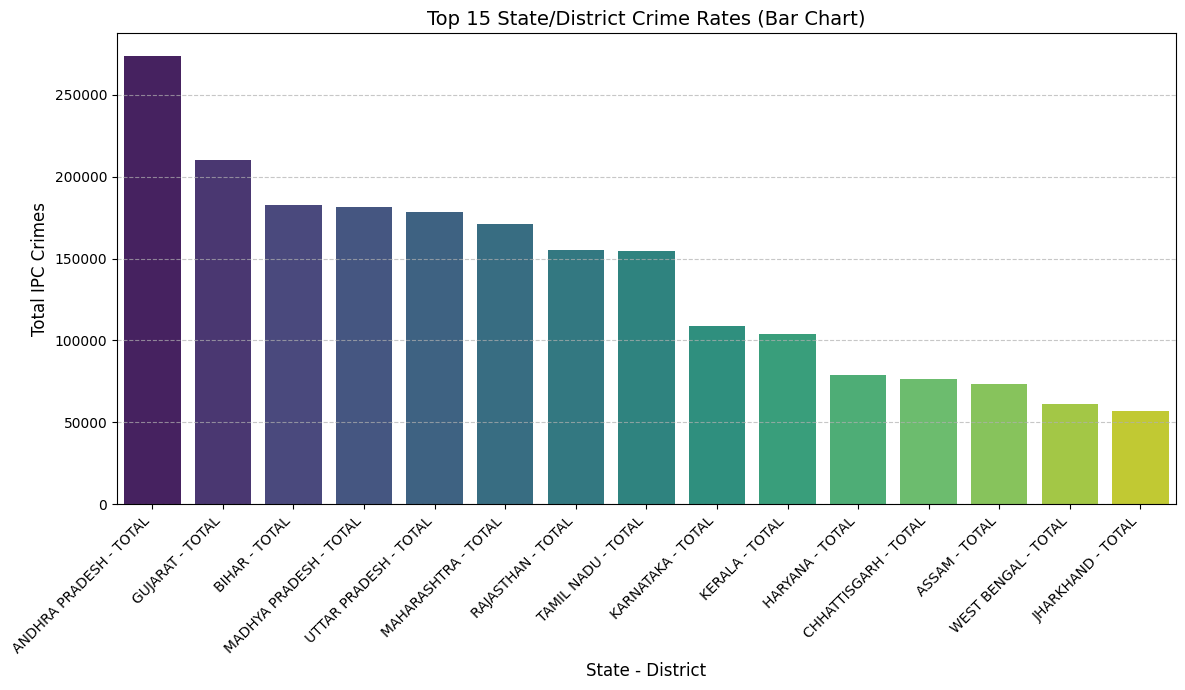

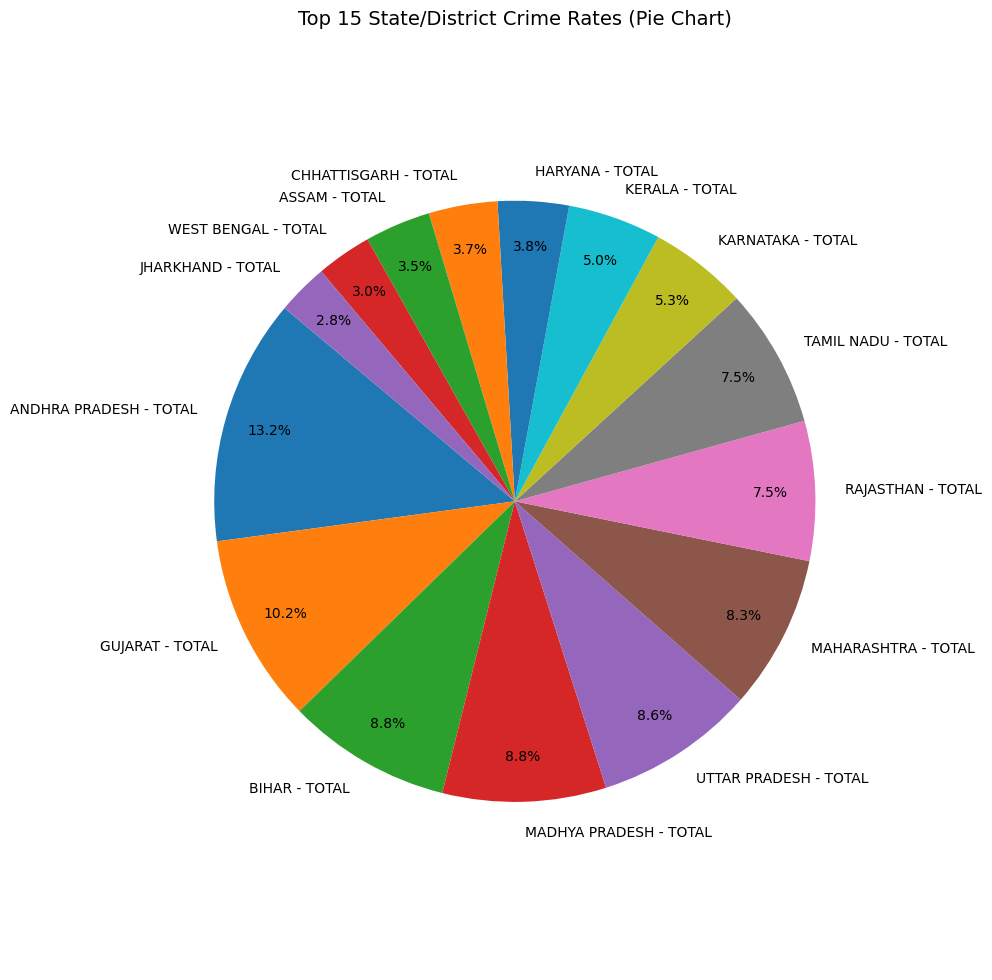

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming 'crime.csv' is in the same directory)
df = pd.read_csv('crime.csv')

# Group by 'STATE/UT' and 'DISTRICT' and sum 'TOTAL IPC CRIMES' to get crime rates
# This aggregates the crime data for each unique state and district combination.
crime_rates = df.groupby(['STATE/UT', 'DISTRICT'])['TOTAL IPC CRIMES'].sum().reset_index()

# Sort the crime rates in descending order to identify the highest ones.
crime_rates_sorted = crime_rates.sort_values(by='TOTAL IPC CRIMES', ascending=False)

# Get the top 15 state and district combinations with the highest crime rates.
top_15_crime_rates = crime_rates_sorted.head(15)

# Create a combined 'State - District' column for better labeling in the charts.
# This makes the labels more descriptive when plotting.
top_15_crime_rates['STATE_DISTRICT'] = top_15_crime_rates['STATE/UT'] + ' - ' + top_15_crime_rates['DISTRICT']

# --- Plotting the Bar Chart ---
plt.figure(figsize=(12, 7)) # Set the figure size for better readability
sns.barplot(x='STATE_DISTRICT', y='TOTAL IPC CRIMES', data=top_15_crime_rates, palette='viridis')
plt.xlabel('State - District', fontsize=12) # Label for the x-axis
plt.ylabel('Total IPC Crimes', fontsize=12) # Label for the y-axis
plt.title('Top 15 State/District Crime Rates (Bar Chart)', fontsize=14) # Title of the chart
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for readability and set font size
plt.yticks(fontsize=10) # Set font size for y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better visualization
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('top_15_crime_rates_bar_chart.png') # Save the bar chart as a PNG file
plt.show() # Display the bar chart

# --- Plotting the Pie Chart ---
plt.figure(figsize=(10, 10)) # Set the figure size for the pie chart
# Create the pie chart.
# 'autopct' formats the percentage values on the slices.
# 'startangle' rotates the start of the first slice.
# 'pctdistance' sets the distance of the percentage labels from the center.
plt.pie(top_15_crime_rates['TOTAL IPC CRIMES'], labels=top_15_crime_rates['STATE_DISTRICT'],
        autopct='%1.1f%%', startangle=140, pctdistance=0.85, textprops={'fontsize': 10})
plt.title('Top 15 State/District Crime Rates (Pie Chart)', fontsize=14) # Title of the pie chart
plt.axis('equal') # Ensure the pie chart is drawn as a perfect circle
plt.tight_layout() # Adjust layout
plt.savefig('top_15_crime_rates_pie_chart.png') # Save the pie chart as a PNG file
plt.show() # Display the pie chart
